# Importing libraries

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading data and underastanding

In [265]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\KNN\\Zoo.csv")

In [267]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [269]:
df.shape

(101, 18)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [273]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [275]:
#checking for duplicates
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [277]:
# Filter rows where 'animal name' is 'frog'
frog_rows = df[df['animal name'] == 'frog']

# Check if 'frog' appears more than once
if len(frog_rows) > 1:
    print("Frog is repeated. Matching rows:")
    print(frog_rows)
else:
    print("Frog is not repeated.")

Frog is repeated. Matching rows:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
25        frog     0         0     1     0         0        1         1   
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
25        1         1         1         0     0     4     0         0   
26        1         1         1         1     0     4     0         0   

    catsize  type  
25        0     5  
26        0     5  


In [279]:
df = df.drop(index=25).reset_index(drop=True)

In [281]:
df['animal name'].value_counts()

animal name
aardvark    1
polecat     1
seal        1
seahorse    1
scorpion    1
           ..
goat        1
gnat        1
girl        1
giraffe     1
wren        1
Name: count, Length: 100, dtype: int64

In [283]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [285]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     3
Name: count, dtype: int64

# Data visualization 

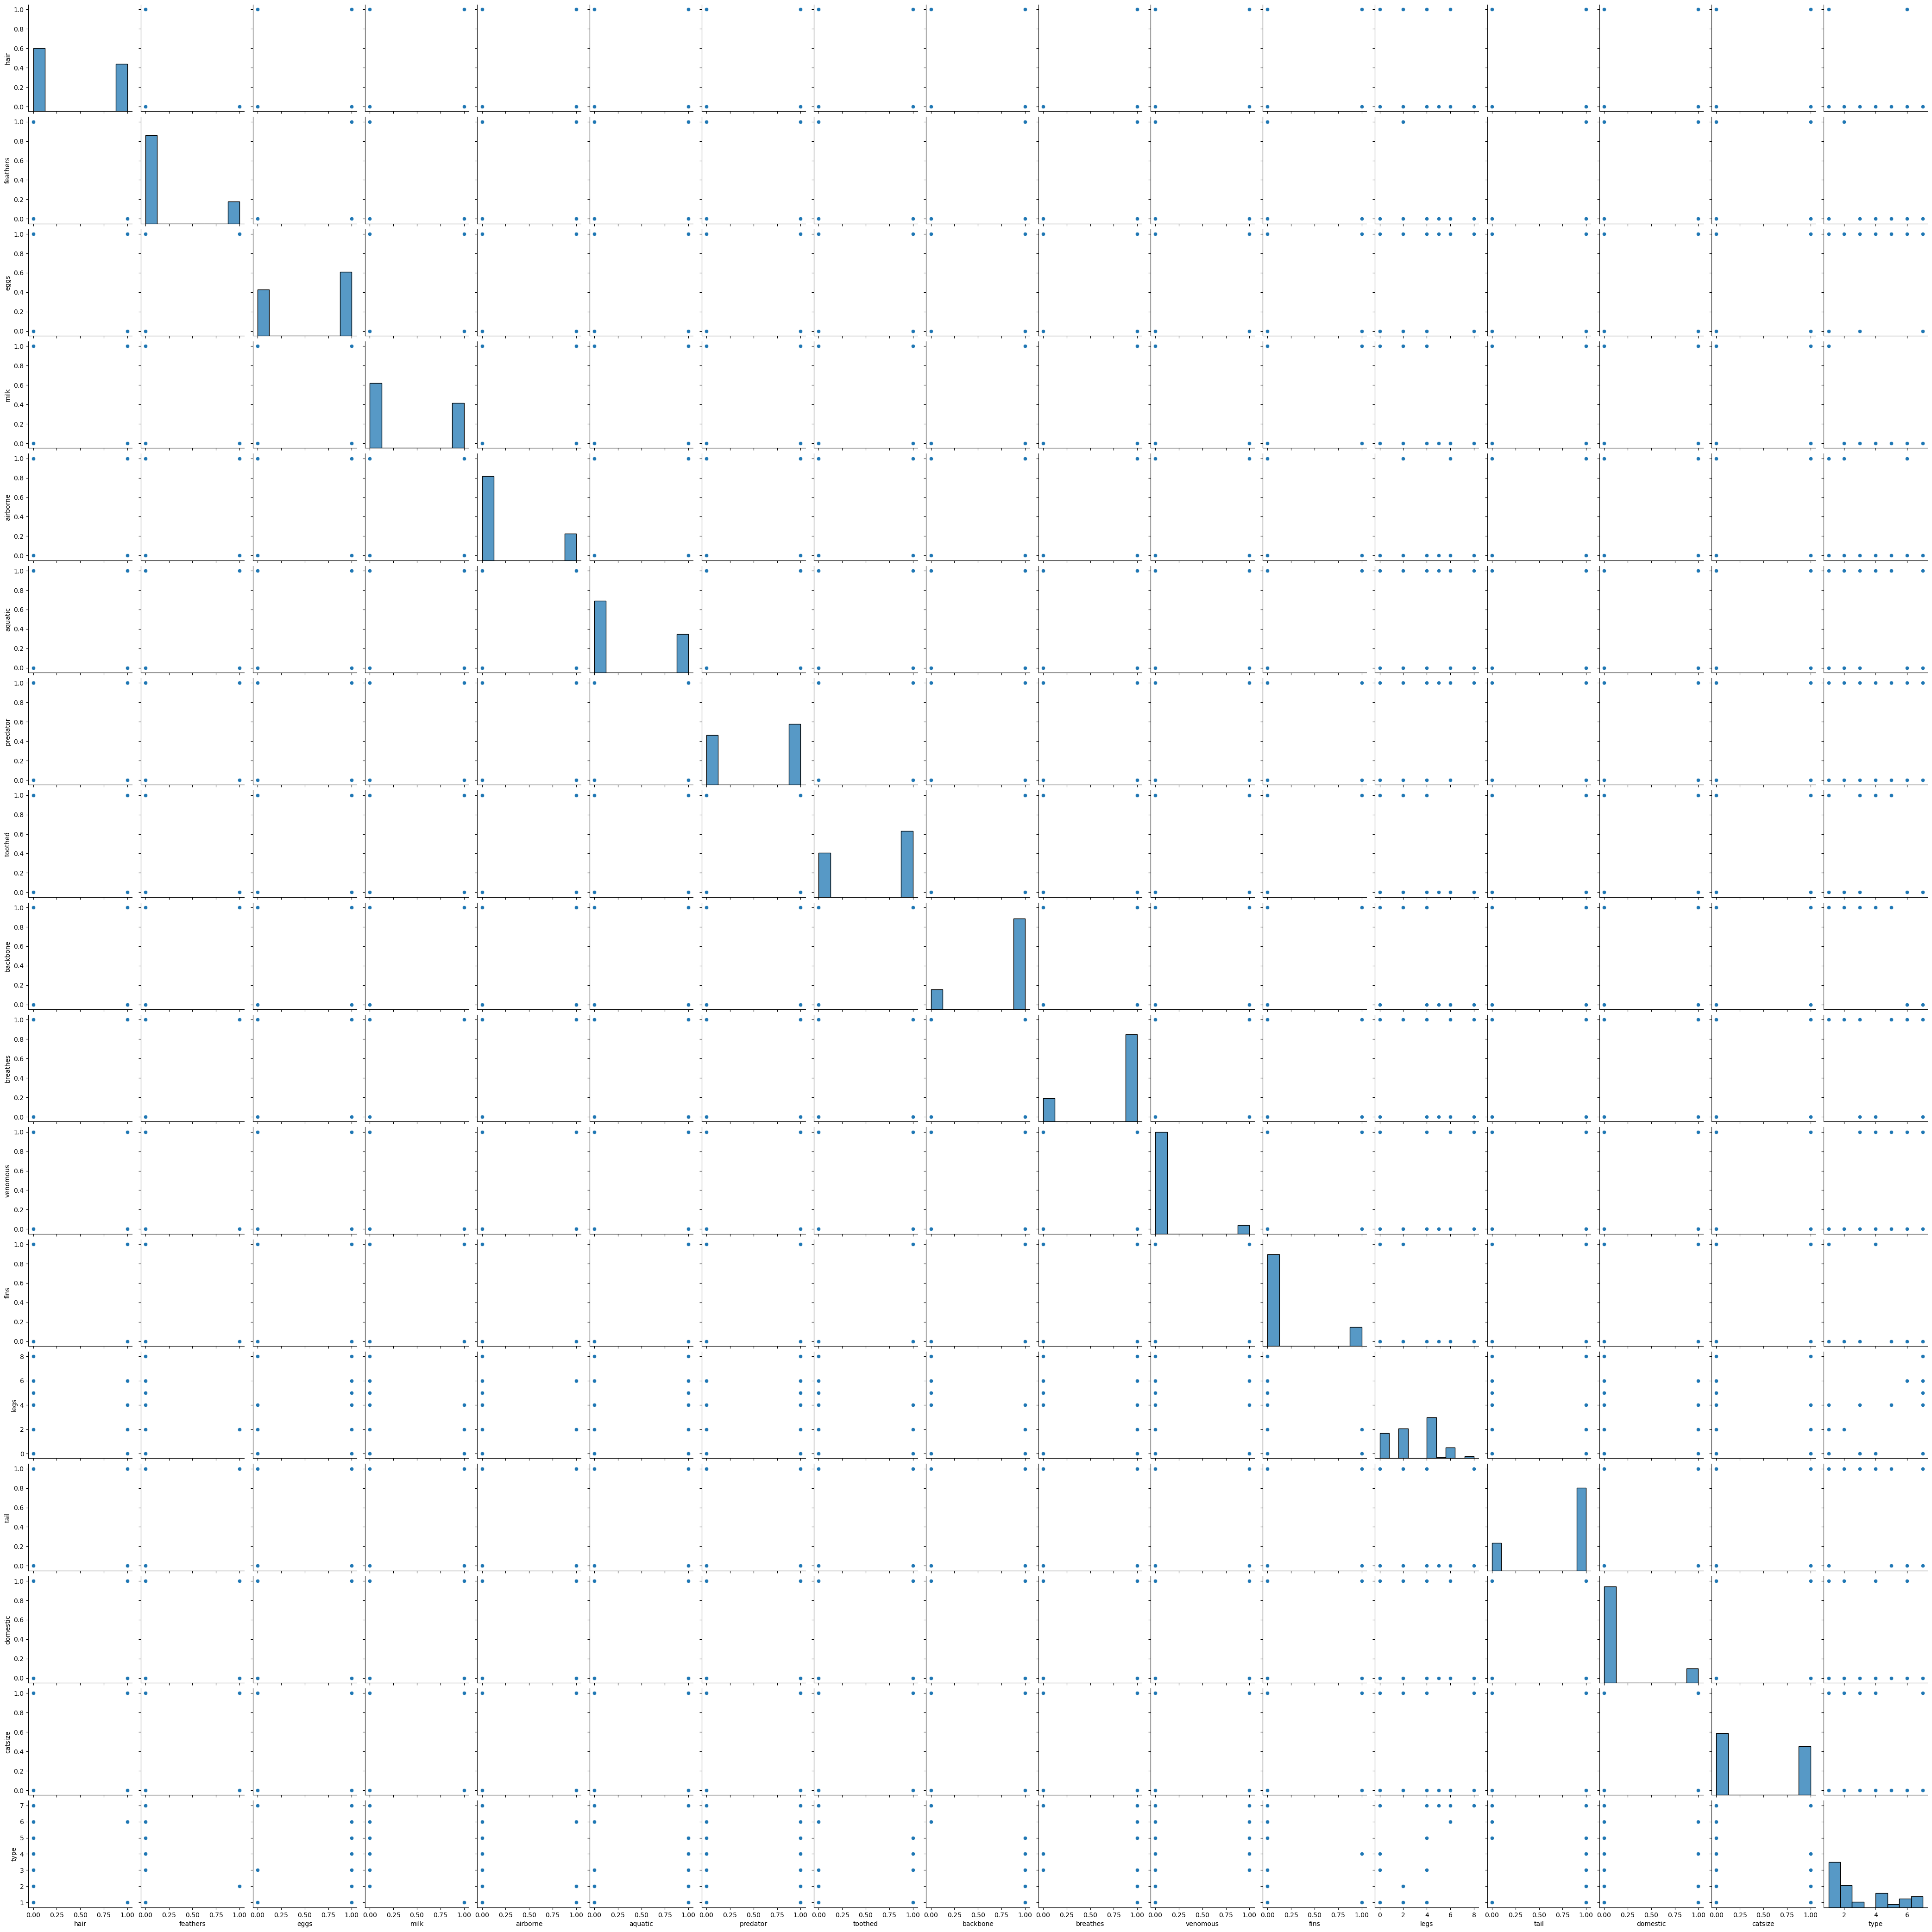

In [287]:
sns.pairplot(df)

<Axes: >

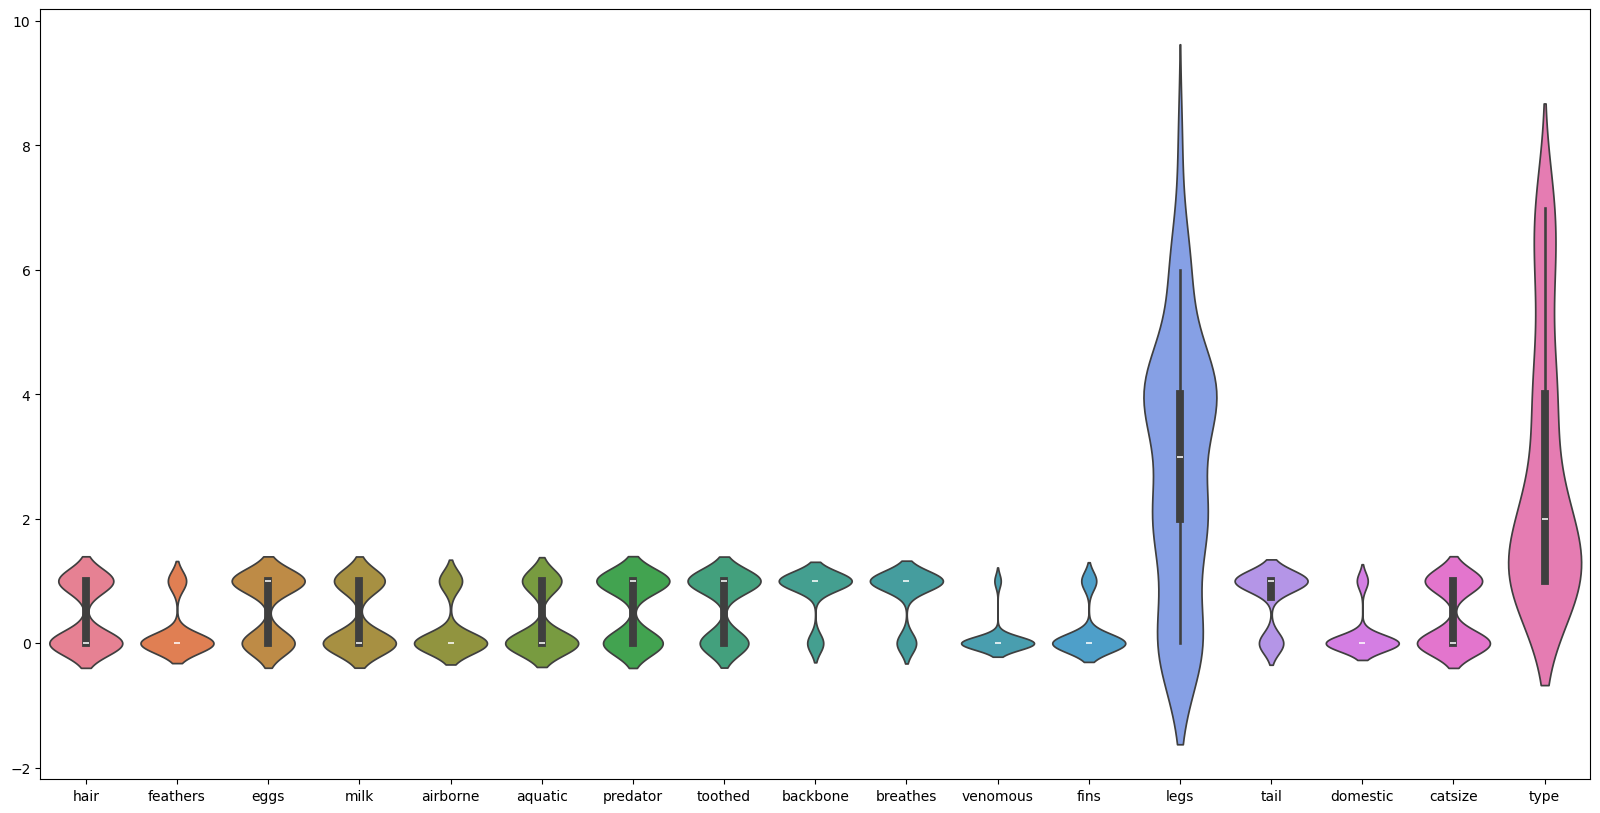

In [293]:
plt.figure(figsize = (20, 10))
sns.violinplot(df)

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

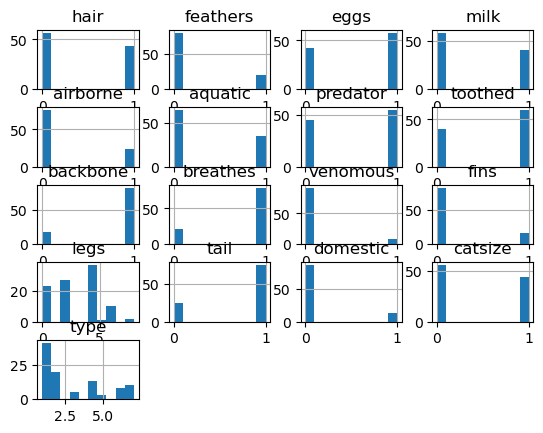

In [295]:
df.hist()

# Model Building

In [229]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [233]:
X = df.drop(['animal name', 'type'], axis = 1)
y = df['type']
#X_train, X_test, Y_train, Y_test = (X, Y, test_size = 0.2, random_state =42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [237]:
y

0     1
1     1
2     4
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: type, Length: 100, dtype: int64

# training the model

In [239]:
num_folds = 10
kfold = KFold(n_splits=10)

In [241]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [243]:
results = cross_val_score(knn, X_train, y_train, cv=kfold)

In [245]:
print(results.mean())

0.875


# testing the model

In [247]:
y_pred = knn.predict(X_test)

In [249]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.71      0.71      0.71        20
weighted avg       0.95      0.95      0.95        20



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\m

# hyper parameter tuning

In [251]:
from sklearn.model_selection import GridSearchCV

In [255]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [257]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [259]:
print(grid.best_score_)
print(grid.best_params_)

0.9625
{'n_neighbors': 1}


# visualizing best k-value

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-pa

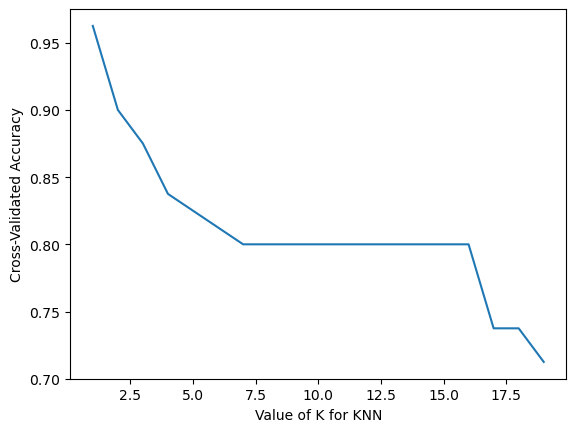

In [261]:
# choose k between 1 to 41
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Q&A

What are the key hyperparameters in KNN

What distance metrics can be used in KNN